### C4021 - Group 4.2 
### Project work Weeks 7-9

#### Machine Learning Algorithm: SGD Regression
Random Forests: 

-This article was a great source of help: http://adataanalyst.com/scikit-learn/regression-scikit-learn/

-This article was a useful source of dimension reduction techniques https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

-This article was also useful for Grid Search techniques
https://medium.com/@elutins/grid-searching-in-machine-learning-quick-explanation-and-python-implementation-550552200596

#### Dataset Information
_Source:_ Boston Housing Dataset - preloaded in scikit-learn.

**Content**
The data set is of housing pricesin Boston. It is a frequently used dataset in Machine Learning problems so this should give many alternative examples from which to learn. 

**Goal**
Finding potential hazardous and non-hazardous asteroids
Features responsible for claiming an asteroid to be hazardous

#### Notebook Structure
1. Data Loading and Pre-processing
2. Model training and testing
3. Model graphing
4. Model analysis: further eaxamination of significant features etc.

#### Team Contributions:
**Training data**

04-NOV-2018 B.Parle Source data identified, loaded and initial analysis. 


**Pre-processing**

04-NOV-2018 B.Parle Data Analysis and feature removal
05-NOV-2018 B.Parle Using correlation to remove features. Dummies for category data


**Algorithm training and evaluation**

05-NOV-2018 B.Parle Implemented SGD Regression and Grid Search to find best hyper parameters


**Visualisation of outputs**

04-NOV-2018 B.Parle _tbc_



In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [2]:
####################
#
# 1. Dataset Loading and Pre-processing
#
####################
boston = load_boston()
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
50.0 5.0 22.532806324110677


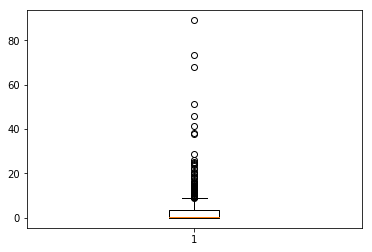

In [3]:
#boston.data
print (boston.data.shape)
print (boston.feature_names)
print (np.max(boston.target), np.min(boston.target), np.mean(boston.target))

#Create pandas dataframe for remaining work
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
#boston_df.describe()

#Use a basic boxplot to investigate data for outliers - follow up on the next section
plt.boxplot(boston_df['CRIM'])
plt.show()

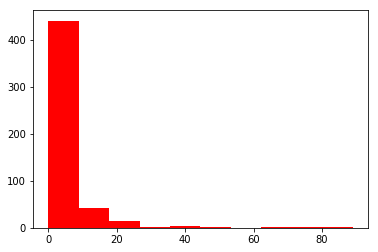

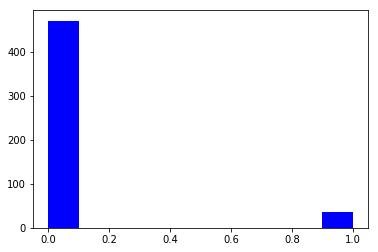

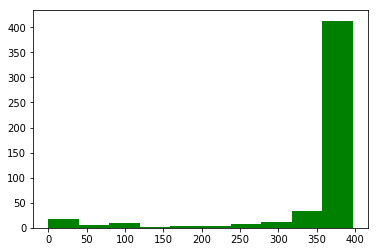

In [4]:
#Issues found during initial analysis that will need to be resolved:
#investigaste 'CRIM','CHAS','B' for outliers
_, myplt = plt.subplots()
myplt.hist(boston_df['CRIM'], color='r')
_, myplt = plt.subplots()
myplt.hist(boston_df['CHAS'], color='b')
_, myplt = plt.subplots()
myplt.hist(boston_df['B'], color='g')

#CRIM and B seem to have significant outliers. For now I will exclude as I want to focus on the 
#environmental factors i.e. ZN, INDUS, NOX, DIS, RAD, PTRATIO.
#Reduce array to interesting features
boston_df_reduced = pd.DataFrame(boston_df[['ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','PTRATIO']])

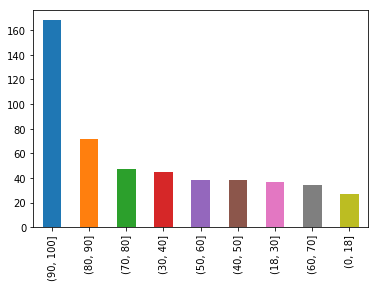

In [5]:
#Put age into categories
age_categories = np.array([0,18,30,40,50,60,70,80,90,100])
boston_df_age1 = pd.DataFrame(pd.cut(boston_df_reduced['AGE'],age_categories))
boston_df_age1.head()
boston_df_age1['AGE'].value_counts().plot(kind='bar')

In [6]:
#These age categories look good so add them back into the dataset
boston_df_reduced['AGECAT'] = pd.Series(pd.cut(boston_df_reduced['AGE'],age_categories))
boston_df_reduced = boston_df_reduced.drop(['AGE'],axis=1)
boston_df_reduced.head()

,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,PTRATIO,AGECAT
0,18.0,2.31,0.0,0.538,6.575,4.0900,1.0,15.3,"(60, 70]"
1,0.0,7.07,0.0,0.469,6.421,4.9671,2.0,17.8,"(70, 80]"
2,0.0,7.07,0.0,0.469,7.185,4.9671,2.0,17.8,"(60, 70]"
3,0.0,2.18,0.0,0.458,6.998,6.0622,3.0,18.7,"(40, 50]"
4,0.0,2.18,0.0,0.458,7.147,6.0622,3.0,18.7,"(50, 60]"


In [7]:
#create dummy features for each AGECAT category
boston_dummies = pd.get_dummies(boston_df_reduced)
boston_dummies.head()

,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,PTRATIO,"AGECAT_(0, 18]","AGECAT_(18, 30]","AGECAT_(30, 40]","AGECAT_(40, 50]","AGECAT_(50, 60]","AGECAT_(60, 70]","AGECAT_(70, 80]","AGECAT_(80, 90]","AGECAT_(90, 100]"
0,18.0,2.31,0.0,0.538,6.575,4.0900,1.0,15.3,0,0,0,0,0,1,0,0,0
1,0.0,7.07,0.0,0.469,6.421,4.9671,2.0,17.8,0,0,0,0,0,0,1,0,0
2,0.0,7.07,0.0,0.469,7.185,4.9671,2.0,17.8,0,0,0,0,0,1,0,0,0
3,0.0,2.18,0.0,0.458,6.998,6.0622,3.0,18.7,0,0,0,1,0,0,0,0,0
4,0.0,2.18,0.0,0.458,7.147,6.0622,3.0,18.7,0,0,0,0,1,0,0,0,0


In [12]:
#examine correlation: 
boston_dummies.corr()
#From the correlation matrix we see these strong correlations (> 0.6)
#col ZN and DIS corr=0.664408
#col INDUS and NOX corr=0.763651
#Let's drop columns ZN and INDUS
boston_df_final = boston_dummies.drop(['ZN','INDUS'],axis=1)

In [22]:
####################
#
# 2. Train & Test
#
####################

#Prior to training, scale the data
myscaler = StandardScaler()
boston_df_scaled = pd.DataFrame(myscaler.fit_transform(boston_df_final),columns=boston_df_final.columns)

#Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(boston_df_scaled, boston.target, test_size=0.6, random_state=39)

#Fit the model
my_sgd = SGDRegressor(alpha=0.0001, learning_rate='invscaling', loss='squared_loss', \
                      max_iter=1000, n_iter=None, random_state=None)
my_sgd.fit(X_train, y_train)

#SGDRegressor(alpha=0.0001, learning_rate='invscaling', loss='squared_loss', \
#             max_iter=1000, n_iter=None, random_state=None)


#SGDRegressor(alpha=0.0001, average=False, early_stopping=False, \
#       epsilon=0.1, eta0=0.01, fit_intercept=True, l1_ratio=0.15, \
#       learning_rate='invscaling', loss='squared_loss', max_iter=1000, \
#       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25, \
#       random_state=None, shuffle=True, tol=None, validation_fraction=0.1, \
#       verbose=0, warm_start=False)


#score the model using the test dataset
sgd_score = my_sgd.score(X_test,y_test)
print('Overall score = {}%'.format(round(sgd_score * 100, 2)))
print('feature importances {}'.format(my_sgd.coef_))

#Try get a better model using Grid Search
grid_learning = ({'alpha':('linear', 'rbf'), 'C':[1, 10]}
>>> svc = svm.SVC(gamma="scale")
>>> clf = GridSearchCV(svc, parameters, cv=5)
>>> clf.fit(iris.data, iris.target)


Overall score = 54.21%
feature importances [ 0.53985472 -2.01166644  5.70119899 -2.05041966 -0.82162179 -1.9794931
  0.4060057   0.55666803  0.9163456   0.01283344  0.25652568  0.12102654
 -0.3641763  -0.44519169 -0.71571819]


In [ ]:
####################
#
# 3. Model Graphing
#
####################

#graph the feature_importances
importances = pd.DataFrame({'feature':nasa_data_x.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=True).set_index('feature')
importances.plot.barh(figsize=(6,6),title='Features sorted by Importance')

In [ ]:
####################
#
# 4. Model Analysis
#
####################

#Generate a set or predictions using the original data set
nasa_data_y_predict = pd.DataFrame(rfc.predict(nasa_data_x_scaled))
nasa_data_y_predict.fillna(False)

In [ ]:
#the 'Minimum Orbit Intersection' and 'Est Dia in M(min)' are the most significant fields so let's 
#plot these against each other and colour with the result vector
myplt_colours = {'True':'green','False':'red'}
map_colour = lambda x: 'red' if x else 'green'
myplt_hazardous_colour=[]
for item in nasa_data_y_predict[0]:
   myplt_hazardous_colour.append(map_colour(item))
#now plot the data
_, myplt = plt.subplots()
myplt.set_title('Minimum Orbit Intersection v Estimated Diameter (Red=Hazardous)')
myplt.scatter(nasa_data['Minimum Orbit Intersection'], nasa_data['Est Dia in M(min)'], c=myplt_hazardous_colour)
_, myplt = plt.subplots()
myplt.set_title('Minimum Orbit Intersection v Perihelion Distance (Red=Hazardous)')
myplt.scatter(nasa_data['Minimum Orbit Intersection'], nasa_data['Perihelion Distance'], c=myplt_hazardous_colour)

#### Summary of observations
The most significant features of the model are, not unsurprisingly perhaps, the Minimum Orbit Intersection (with Earth orbit) and the Size of the Asteroid. The perihelion distance is also a useful feature, although as the second graph shows, it does not provide a distinct categorization for near earth orbit intersections.

A useful next step would be to define the boundary of the categories to aid with classification visualisation.